# 競争系
$$
\tag{1}
\begin{cases}
	\frac{d x}{d t}=a x -b x^2-c x y\\
	\frac{d y}{d t}=d y - ex y -f y^2
\end{cases}
$$
ただし，$a, b, c, d, e, f >0$とする．

このモデルについて局所安定性解析をおこなう．

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def simLVModelCompetitive(a,b,c,d,e,f,x0,y0,dt,tEnd):
    # 初期値
    x = x0
    y = y0
    t = 0.0

    # 時間の設定
    iEnd = int(tEnd/dt)+1

    xList = [x]
    yList = [y]
    tList = [t]
    for i in range(iEnd):
        t = dt*i
        xx = x + dt*(a-b*x-c*y)*x
        yy = y + dt*(d - e*x-f*y)*y
        x = xx
        y = yy
        tList.append(t)
        xList.append(x)
        yList.append(y)
    return (tList, xList, yList)

In [3]:
# モデルのパラメータ
a = 2.0
b = 3.0
c = 1.0
d = 2.0
e = 0.4
f = 2.2

x0 = 0.15
y0 = 0.1
dt = 0.0001
tEnd=10

tList, xList, yList = simLVModelCompetitive(a,b,c,d,e,f,x0,y0,dt,tEnd)

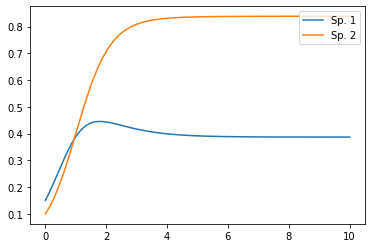

In [4]:
# 時間発展のプロット
plt.plot(tList, xList)
plt.plot(tList, yList)
plt.legend(["Sp. 1", "Sp. 2"],loc='upper right')

Text(0, 0.5, 'Sp. 2')

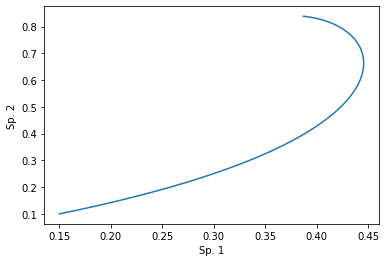

In [5]:
# 相図
plt.plot(xList,yList)
plt.xlabel("Sp. 1")
plt.ylabel("Sp. 2")

## 平衡点と局所安定性

### 平衡点
競争系（式1）の右辺をそれぞれ$f_1(x,y) = a x -b x^2-c x y,f_2(x,y) = d y - ex y -f y^2$とすれば

連立方程式
$$
\begin{cases}
f_1(x,y) = 0\\
f_2(x,y) = 0
\end{cases}
$$
を解けばよい．以下の４つが得られる．

1. $\left(x^*_1, y^*_1\right) = \left(0 ,0\right) $
1. $\left(x^*_2, y^*_2\right) = \left(0 ,\frac{d}{f}\right)$
1. $\left(x^*_3, y^*_3\right) = \left(\frac{a}{b} ,0\right)$
1. $\left(x^*_4, y^*_4\right) = \left(\frac{a f-cd}{bf-ce},\frac{bd-ae}{bf-ce}\right)$

それぞれについて局所安定性を調べよう．

### 局所安定性
まずヤコビ行列を求めよう．

ヤコビ行列$\mathbf{J}$は
$$
\mathbf{J} = \frac{d \mathbf{f}}{d\mathbf{x}}
 = \begin{pmatrix}
    a - 2 b x - c y & - c x\\
    - e y & d - e x - 2 f y
\end{pmatrix}
$$
となる．ただし，$\mathbf{f} = (f_1, f_2)^T$，$\mathbf{x} = (x, y)^T$．

### 1の場合
$(x^*_1, y^*_1) = (0,0)$のとき

$$
\mathbf{J}_1 = \begin{pmatrix}
    a  & 0\\
    0 & d
\end{pmatrix}
$$

よって，固有方程式
$$
|\mathbf{J}_1 - \lambda \mathbf{I}| = 
\left|
\begin{matrix}
    a -\lambda & 0\\
    0 & d -\lambda
\end{matrix}
\right| = \left(a - \lambda \right) \left(d - \lambda \right) = 0
$$
を$\lambda$について解けばよい．

よって，$\lambda_1 = a, \lambda_2 = d$で$a, d > 0$なので，常に不安定．

### 2の場合
$(x^*_2, y^*_2) = \left(0,\frac{d}{f}\right)$のとき

$$
\mathbf{J}_2 = \begin{pmatrix}
a - \frac{c d}{f} & 0\\
- \frac{d e}{f} & - d
\end{pmatrix}
$$

よって，固有方程式
$$
|\mathbf{J}_2 - \lambda \mathbf{I}| = 
\left|
\begin{matrix}
a - \frac{c d}{f} -\lambda & 0\\
- \frac{d e}{f} & - d -\lambda
\end{matrix}
\right| = \left(\lambda + d \right) \left(\lambda - a + \frac{c d}{f} \right) = 0
$$
を$\lambda$について解けばよい．

よって，$\lambda_1 = -d, \lambda_2 = a - \frac{cd}{f}$となる．

そのため
* $af -cd < 0$のとき安定
* $af -cd > 0$のとき不安定

### 3の場合
$(x^*_3, y^*_3) = \left(\frac{a}{b} ,0\right)$のとき

$$
\mathbf{J}_3 = \begin{pmatrix}
- a & - \frac{a c}{b}\\
0 & d - \frac{a e}{b}
\end{pmatrix}
$$

よって，固有方程式
$$
|\mathbf{J}_3 - \lambda \mathbf{I}| = 
\left|
\begin{matrix}
- a -\lambda & - \frac{a c}{b}\\
0 & d - \frac{a e}{b} -\lambda
\end{matrix}
\right| = \left(\lambda + a \right) \left(\lambda  - d + \frac{a e}{b} \right) = 0
$$
を$\lambda$について解けばよい．

よって，$\lambda_1 = -a, \lambda_2 = d - \frac{ae}{b}$となる．

そのため
* $bd -ae < 0$のとき安定
* $bd -ae > 0$のとき不安定

### 4の場合
$(x^*_4, y^*_4) = \left(\frac{a f-cd}{bf-ce},\frac{bd-ae}{bf-ce}\right)$のとき

$$
\mathbf{J}_4 
 = \begin{pmatrix}
    - b x^* & - c x^*\\
    - e y^* & - f y^*
\end{pmatrix}
$$

よって，固有方程式
$$
|\mathbf{J}_4 - \lambda \mathbf{I}| = 
\left|
\begin{matrix}
    - b x^* -\lambda & - c x^*\\
    - e y^* & - f y^* -\lambda
\end{matrix}
\right| = \lambda^2 + (bx^*+fy^*)\lambda+ (b f  - c e) x^* y^* = 0
$$
を$\lambda$について解けばよい．

よって，$\lambda_{1,2} = \frac{-(bx^*+fy^*)\pm \sqrt{(bx^*+fy^*)^2-4(b f  - c e) x^* y^*}}{2}$となる．

最大固有値を調べれば良いので，
$$
-4(b f  - c e) x^* y^* \left(= -4 \frac{(af-cd)(cd -ae)}{(bf-ce)}\right)
$$
の符号で決まる．今回は$x^*, y^* > 0$の場合を知りたいので$bf-ce$の符号により


そのため
* $bf-ce > 0$のとき安定
* $bf-ce < 0$のとき不安定

## 相空間におけるベクトル場と解軌道
相空間のベクトル場を流線プロットで見てみよう．

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

In [7]:
# 流線プロットによるベクトル場の可視化
def plotVecFieldCompetitive(a,b,c,d,e,f,rangeX,rangeY,meshX,meshY, sol = None):
    U = a*meshX-b*meshX**2-c*meshX*meshY
    V = d*meshY-e*meshX*meshY-f*meshY**2

    M = np.sqrt(U**2 + V**2)

    # アイソクライン
    lineX = np.linspace(rangeX[0],rangeX[1],100)
    isocline1 = (a - b*lineX)/c
    isocline2 = (d - e*lineX)/f

    # 条件
    print("bf - ce = ", b*f-c*e)
    print("af - cd = ", a*f-c*d)
    print("bd - ae = ", b*d-a*e)

    # 作図
    fig, axes = plt.subplots(figsize=(8,8))
    strm = plt.streamplot(meshX, meshY, U, V, color=M,density=(0.8,0.8), linewidth=1,
                          arrowsize=2, cmap='gist_rainbow_r')
    fig.colorbar(strm.lines)
    axes.set_aspect("equal")
    axes.set_title('Stream Plot')
    plt.plot(lineX,isocline1, "b--",linewidth=3)
    plt.plot(lineX,isocline2, "r--",linewidth=3)
    plt.plot(0,0, "ko", 0, d/f ,"ko", a/b, 0,"ko", (a*f-c*d)/(b*f-c*e),(b*d-a*e)/(b*f-c*e),"ko", markersize = 8)
    plt.xlim(rangeX[0]-0.05,rangeX[1])
    plt.ylim(rangeY[0]-0.05,rangeY[1])
    plt.xlabel("Sp. 1")
    plt.ylabel("Sp. 2")
    
    if sol is not None:
        plt.plot(sol[0],sol[1], ".", linewidth=2)

bf - ce =  6.2
af - cd =  2.4000000000000004
bd - ae =  5.2


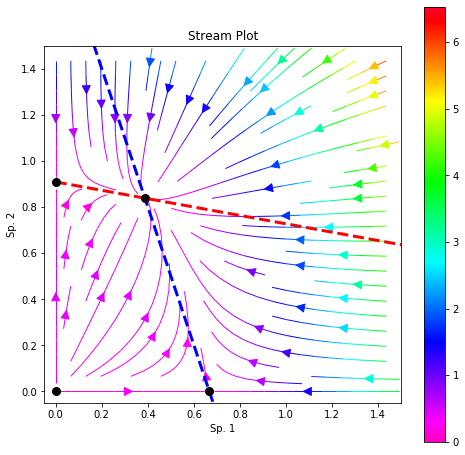

In [8]:
rangeX = (0,1.5)
rangeY = (0,1.5)
meshX, meshY = np.meshgrid(
    np.arange(rangeX[0], rangeX[1], .01), 
    np.arange(rangeY[0], rangeY[1], .01))
a = 2.0
b = 3.0
c = 1.0
d = 2.0
e = 0.4
f = 2.2

plotVecFieldCompetitive(a,b,c,d,e,f,rangeX,rangeY,meshX,meshY)

解軌道も同時にプロットしてみる．
`plotVecField()`関数の引数`sol`にシミュレーションの結果`xList`と`yList`をまとめたリストを渡そう．

bf - ce =  6.2
af - cd =  2.4000000000000004
bd - ae =  5.2


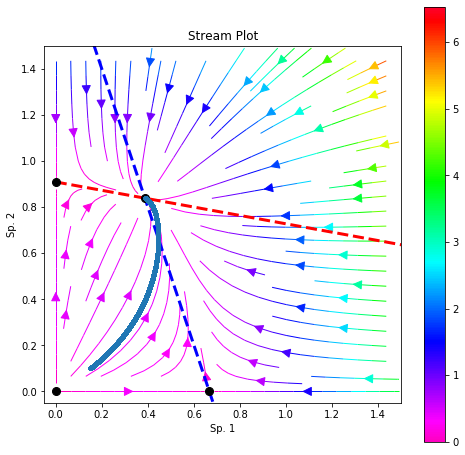

In [9]:
rangeX = (0,1.5)
rangeY = (0,1.5)
meshX, meshY = np.meshgrid(
    np.arange(rangeX[0], rangeX[1], .01), 
    np.arange(rangeY[0], rangeY[1], .01))
a = 2.0
b = 3.0
c = 1.0
d = 2.0
e = 0.4
f = 2.2

x0 = 0.15
y0 = 0.1
dt = 0.0001
tEnd=10

tList, xList, yList = simLVModelCompetitive(a,b,c,d,e,f,x0,y0,dt,tEnd)

plotVecFieldCompetitive(a,b,c,d,e,f,rangeX,rangeY,meshX,meshY,[xList, yList])

# 共生系
$$
\tag{2}
\begin{cases}
	\frac{d x}{d t}=a x -b x^2 + c x y\\
	\frac{d y}{d t}=d y + ex y -f y^2
\end{cases}
$$
ただし，$a, b, c, d, e, f >0$とする．

このモデルについて局所安定性解析をおこなう．

In [10]:
def simLVModelSymbiotic(a,b,c,d,e,f,x0,y0,dt,tEnd):
    # 初期値
    x = x0
    y = y0
    t = 0.0

    # 時間の設定
    iEnd = int(tEnd/dt)+1

    xList = [x]
    yList = [y]
    tList = [t]
    for i in range(iEnd):
        t = dt*i
        xx = x + dt*(a-b*x+c*y)*x
        yy = y + dt*(d +e*x-f*y)*y
        x = xx
        y = yy
        tList.append(t)
        xList.append(x)
        yList.append(y)
    return (tList, xList, yList)

In [11]:
# モデルのパラメータ
a = 2.0
b = 3.0
c = 1.0
d = 2.0
e = 0.4
f = 2.2

x0 = 0.15
y0 = 0.1
dt = 0.0001
tEnd=10

tList, xList, yList = simLVModelSymbiotic(a,b,c,d,e,f,x0,y0,dt,tEnd)

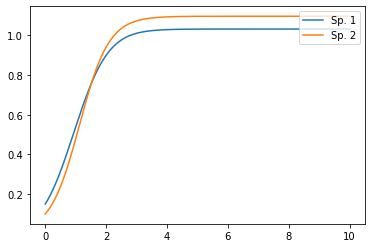

In [12]:
# 時間発展のプロット
plt.plot(tList, xList)
plt.plot(tList, yList)
plt.legend(["Sp. 1", "Sp. 2"],loc='upper right')

Text(0, 0.5, 'Sp. 2')

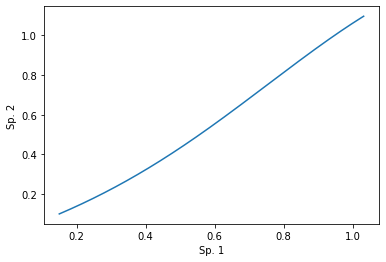

In [13]:
# 相図
plt.plot(xList,yList)
plt.xlabel("Sp. 1")
plt.ylabel("Sp. 2")

## 平衡点と局所安定性

### 平衡点
競争系（式2）の右辺をそれぞれ$f_1(x,y) = a x -b x^2 + c x y,f_2(x,y) = d y + ex y -f y^2$とすれば

連立方程式
$$
\begin{cases}
f_1(x,y) = 0\\
f_2(x,y) = 0
\end{cases}
$$
を解けばよい．以下の４つが得られる．

1. $\left(x^*_1, y^*_1\right) = \left(0 ,0\right) $
1. $\left(x^*_2, y^*_2\right) = \left(0 ,\frac{d}{f}\right)$
1. $\left(x^*_3, y^*_3\right) = \left(\frac{a}{b} ,0\right)$
1. $\left(x^*_4, y^*_4\right) = \left(\frac{a f+cd}{bf-ce},\frac{bd+ae}{bf-ce}\right)$

それぞれについて局所安定性を調べよう．

### 局所安定性
まずヤコビ行列を求めよう．

ヤコビ行列$\mathbf{J}$は
$$
\mathbf{J} = \frac{d \mathbf{f}}{d\mathbf{x}}
 = \begin{pmatrix}
    a - 2 b x + c y & c x\\
    e y & d + e x - 2 f y
\end{pmatrix}
$$
となる．ただし，$\mathbf{f} = (f_1, f_2)^T$，$\mathbf{x} = (x, y)^T$．

### 1の場合
$(x^*_1, y^*_1) = (0,0)$のとき

$$
\mathbf{J}_1 = \begin{pmatrix}
    a  & 0\\
    0 & d
\end{pmatrix}
$$

よって，固有方程式
$$
|\mathbf{J}_1 - \lambda \mathbf{I}| = 
\left|
\begin{matrix}
    a -\lambda & 0\\
    0 & d -\lambda
\end{matrix}
\right| = \left(a - \lambda \right) \left(d - \lambda \right) = 0
$$
を$\lambda$について解けばよい．

よって，$\lambda_1 = a, \lambda_2 = d$で$a, d > 0$なので，常に不安定．

### 2の場合
$(x^*_2, y^*_2) = \left(0,\frac{d}{f}\right)$のとき

$$
\mathbf{J}_2 = \begin{pmatrix}
a + \frac{c d}{f} & 0\\
\frac{d e}{f} & - d
\end{pmatrix}
$$

よって，固有方程式
$$
|\mathbf{J}_2 - \lambda \mathbf{I}| = 
\left|
\begin{matrix}
a + \frac{c d}{f} -\lambda & 0\\
 \frac{d e}{f} & - d -\lambda
\end{matrix}
\right| = \left(\lambda + d \right) \left(\lambda - a - \frac{c d}{f} \right) = 0
$$
を$\lambda$について解けばよい．

よって，$\lambda_1 = - d, \lambda_2 = a + \frac{cd}{f}$となる．

$\lambda_2>0$なので，常に不安定．

### 3の場合
$(x^*_3, y^*_3) = \left(\frac{a}{b} ,0\right)$のとき

$$
\mathbf{J}_3 = \begin{pmatrix}
- a & \frac{a c}{b}\\
0 & \frac{a e}{b} + d
\end{pmatrix}
$$

よって，固有方程式
$$
|\mathbf{J}_3 - \lambda \mathbf{I}| = 
\left|
\begin{matrix}
- a -\lambda & - \frac{a c}{b}\\
0 & d - \frac{a e}{b} -\lambda
\end{matrix}
\right| = \left(\lambda + a \right) \left(\lambda - d - \frac{a e}{b} \right) = 0
$$
を$\lambda$について解けばよい．

よって，$\lambda_1 = -a, \lambda_2 = d + \frac{ae}{b}$となる．

$\lambda_2 > 0$なので，常に不安定．

### 4の場合
$(x^*_4, y^*_4) = \left(\frac{a f+cd}{bf-ce},\frac{bd+ae}{bf-ce}\right)$のとき

$$
\mathbf{J}_4 
 = \begin{pmatrix}
    - b x^* & - c x^*\\
    - e y^* & - f y^*
\end{pmatrix}
$$

よって，固有方程式
$$
|\mathbf{J}_4 - \lambda \mathbf{I}| = 
\left|
\begin{matrix}
    - b x^* -\lambda & - c x^*\\
    - e y^* & - f y^* -\lambda
\end{matrix}
\right| = \lambda^2 + (bx^*+fy^*)\lambda+ (b f  - c e) x^* y^* = 0
$$
を$\lambda$について解けばよい．

よって，$\lambda_{1,2} = \frac{-(bx^*+fy^*)\pm \sqrt{(bx^*+fy^*)^2-4(b f  - c e) x^* y^*}}{2}$となる．

最大固有値を調べれば良いので，
$$
-4(b f  - c e) x^* y^* \left(= -4 \frac{(af-cd)(cd -ae)}{(bf-ce)}\right)
$$
の符号で決まる．今回は$x^*, y^* > 0$の場合を知りたいので$bf-ce$の符号により


そのため
* $bf-ce > 0$のとき安定
* $bf-ce < 0$のとき不安定

## 相空間におけるベクトル場と解軌道
相空間のベクトル場を流線プロットで見てみよう．

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

In [15]:
# 流線プロットによるベクトル場の可視化
def plotVecFieldSymbiotic(a,b,c,d,e,f,rangeX,rangeY,meshX,meshY, sol = None):
    U = a*meshX-b*meshX**2+c*meshX*meshY
    V = d*meshY+e*meshX*meshY-f*meshY**2

    M = np.sqrt(U**2 + V**2)

    # アイソクライン
    lineX = np.linspace(rangeX[0],rangeX[1],100)
    isocline1 = (-a + b*lineX)/c
    isocline2 = (d + e*lineX)/f

    # 条件
    print("bf - ce = ", b*f-c*e)

    # 作図
    fig, axes = plt.subplots(figsize=(8,8))
    strm = plt.streamplot(meshX, meshY, U, V, color=M,density=(0.8,0.8), linewidth=1,
                          arrowsize=2, cmap='gist_rainbow_r')
    fig.colorbar(strm.lines)
    axes.set_aspect("equal")
    axes.set_title('Stream Plot')
    plt.plot(lineX,isocline1, "b--",linewidth=3)
    plt.plot(lineX,isocline2, "r--",linewidth=3)
    plt.plot(0,0, "ko", 0, d/f ,"ko", a/b, 0,"ko", (a*f+c*d)/(b*f-c*e),(b*d+a*e)/(b*f-c*e),"ko", markersize = 8)
    plt.xlim(rangeX[0]-0.05,rangeX[1])
    plt.ylim(rangeY[0]-0.05,rangeY[1])
    plt.xlabel("Sp. 1")
    plt.ylabel("Sp. 2")
    
    if sol is not None:
        plt.plot(sol[0],sol[1], ".", linewidth=2)

bf - ce =  -2.999999999999999


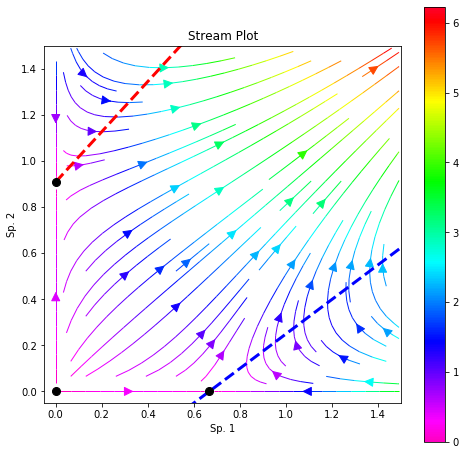

In [16]:
rangeX = (0,1.5)
rangeY = (0,1.5)
meshX, meshY = np.meshgrid(
    np.arange(rangeX[0], rangeX[1], .01), 
    np.arange(rangeY[0], rangeY[1], .01))
a = 2.0
b = 3.0
c = 4.0
d = 2.0
e = 2.4
f = 2.2

plotVecFieldSymbiotic(a,b,c,d,e,f,rangeX,rangeY,meshX,meshY)

bf - ce =  -2.999999999999999


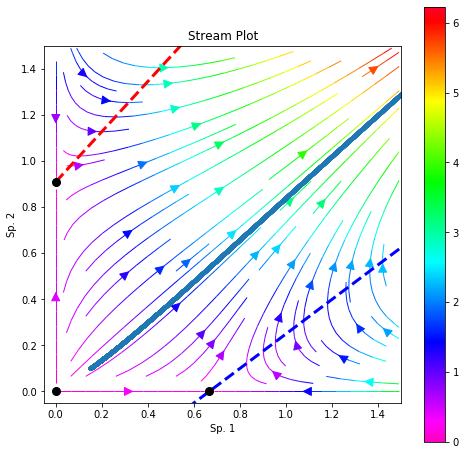

In [17]:
rangeX = (0,1.5)
rangeY = (0,1.5)
meshX, meshY = np.meshgrid(
    np.arange(rangeX[0], rangeX[1], .01), 
    np.arange(rangeY[0], rangeY[1], .01))
a = 2.0
b = 3.0
c = 4.0
d = 2.0
e = 2.4
f = 2.2

x0 = 0.15
y0 = 0.1
dt = 0.0001
tEnd=10

tList, xList, yList = simLVModelSymbiotic(a,b,c,d,e,f,x0,y0,dt,tEnd)

plotVecFieldSymbiotic(a,b,c,d,e,f,rangeX,rangeY,meshX,meshY,[xList, yList])